In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I am trying to find some patterns in my data, for K means clustering I will need to specify the number of cluster

In [2]:
#generate artificial data using scikit learn (useful when playing around with algorithms)
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features =2, centers = 4, cluster_std=1.8, random_state=101)

In [4]:
#the data itself is a tuple.
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

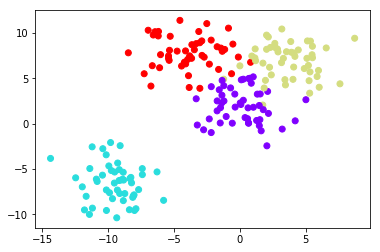

In [8]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow');

In [9]:
#Use Scikit learn to make a k-means clustering algorithm
from sklearn.cluster import KMeans

In [10]:
#K means is unsupervised, randomly assigns each observation to a cluster and finds the centroid of each cluster
#algorithm iterates through the two steps, reassigns data points to the cluster whose centroid is closest, populates new centroid for each
#cluster and then repeats over and over until the cluster variation cannot be reduced any further
kmeans=KMeans(n_clusters=4)

In [11]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.cluster_centers_ #these are an array of the actual centers of the clusters

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [13]:
kmeans.labels_ # these are the predicted labels the model believes to be true for the clusters

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3])

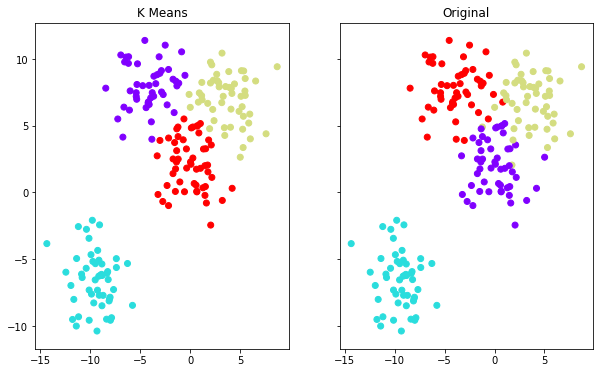

In [18]:
#Graphically compare the k means prediction vs the original clustered data using matplotlib
fig , (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means') #Tuple unpacking done here
ax1.scatter(data[0][:,0],data[0][:,1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')

In the true data set, there is more noise than the K Means clustered set. Also, the colors don't necessarily correlate between the two sets. The color only matters relative to each cluster in its own plot

In [20]:
#What happens if we set K Means = 2? 3?
kmeans2=KMeans(n_clusters=2)
kmeans3=KMeans(n_clusters=3)
kmeans2.fit(data[0])
kmeans3.fit(data[0])
kmeans2.cluster_centers_
kmeans3.cluster_centers_
kmeans2.labels_
kmeans3.labels_

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1])

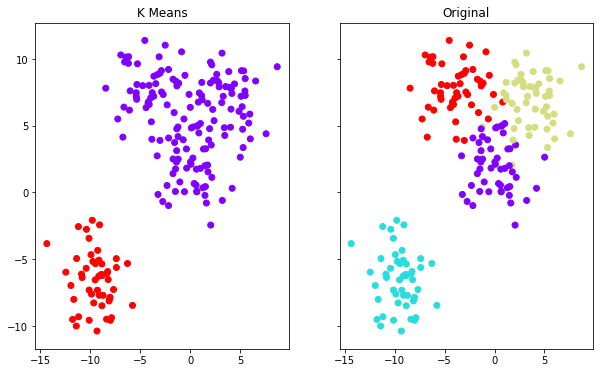

In [24]:
fig , (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means') #Tuple unpacking done here
ax1.scatter(data[0][:,0],data[0][:,1], c=kmeans2.labels_, cmap='rainbow');

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow');

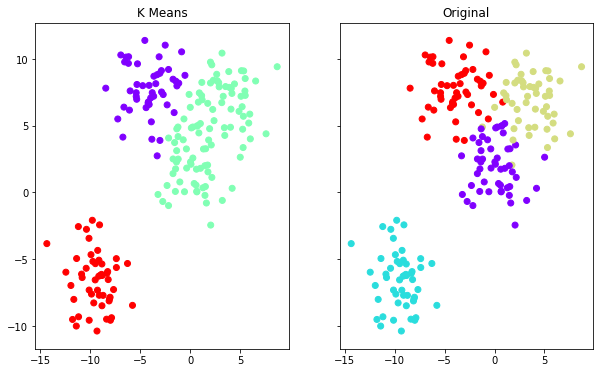

In [23]:
fig , (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means') #Tuple unpacking done here
ax1.scatter(data[0][:,0],data[0][:,1], c=kmeans3.labels_, cmap='rainbow');

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow');

#K means is an usupervised learning algorithm, usually would not have labels like we started off with. K means tries to give you the lables

# Summary: Import KMeans, instantiate KMeans with the number of clusters you want to explore, fit it to your features/data, can report back cluster centers if you wanted them, more importanly report back the labels

# Cluster Universities into two groups: Public and Private

In [26]:
import seaborn as sns

In [27]:
#Read in the college data to create a dataframe
df = pd.read_csv('College_Data',index_col=0)

In [28]:
#EDA of the data
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [29]:
df.info() #777 integer rows

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [30]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


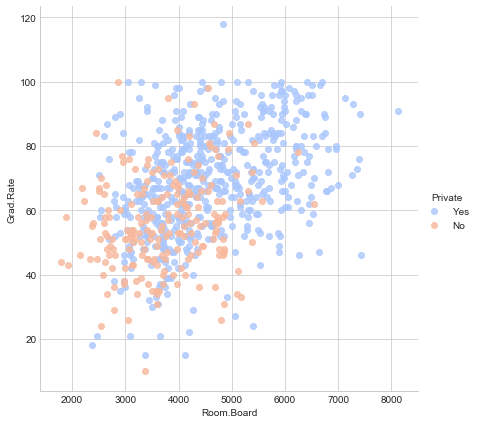

In [33]:
# Graphically explore the data via visualizations
#Creating a scatterplot of Grad.Rate vs Room.Board where the points are colored by the Private column
sns.set_style('whitegrid')
sns.lmplot('Room.Board', 'Grad.Rate',data=df,hue='Private', palette='coolwarm', size=6,aspect=1,fit_reg=False);

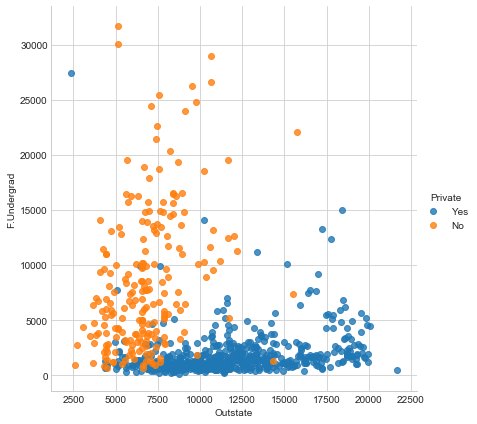

In [37]:
#create a scatterplot of F.Undergrad vs. Outstate where the points are colored by the Private Column
sns.set_style('whitegrid')
sns.lmplot('Outstate', 'F.Undergrad',data=df,hue='Private', size=6,aspect=1,fit_reg=False);

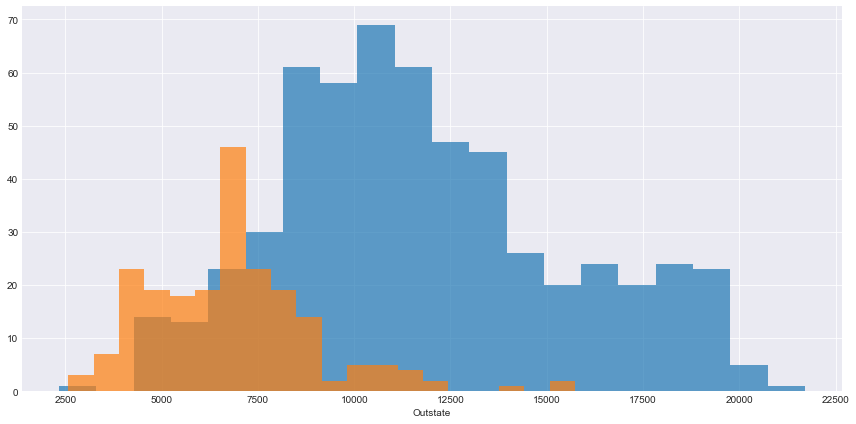

In [40]:
#Creating a stacked histogram showing Out of State Tuition based on the Private Column
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", size = 6, aspect =2)
g= g.map(plt.hist,'Outstate', bins=20, alpha=0.7)

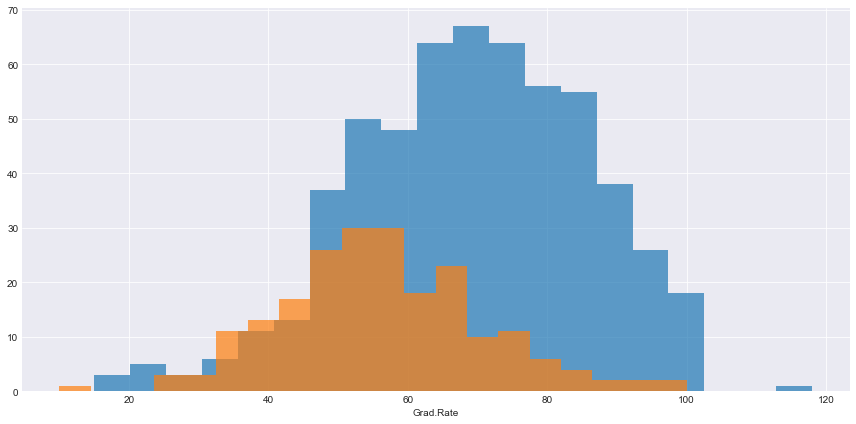

In [41]:
#creating a similar one for Grad.Rate
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", size = 6, aspect =2)
g= g.map(plt.hist,'Grad.Rate', bins=20, alpha=0.7)

In [42]:
#Found an outlier for grad rate. Let's see what that is
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [43]:
# We need to clean this data point up so that it makes sense to our model. We are going to set it to be 100
df['Grad.Rate']['Cazenovia College'] =100


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
# Did it work as intended? Let's check Grad.Rate again
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


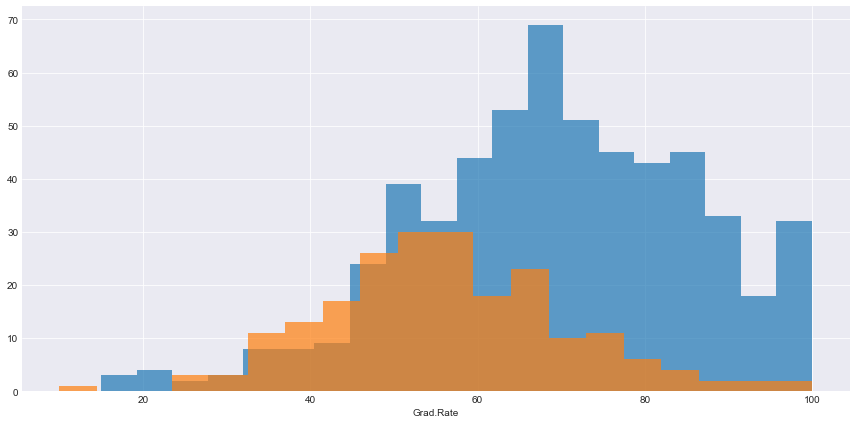

In [45]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", size = 6, aspect =2)
g= g.map(plt.hist,'Grad.Rate', bins=20, alpha=0.7)

# K Means Cluster Creation

In [46]:
kmeansZ=KMeans(n_clusters=2) #Creating an instance of a K Means model with 2 clusters

In [48]:
kmeansZ.fit(df.drop('Private', axis=1)) # Fitting the model to all the data except for the Private label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
kmeansZ.cluster_centers_ #finding the cluster center vectors

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

# Evaluation of our model

In [51]:
#Creating a new column for our df called "Cluster" which is a 1 for a Private school, and a 0 for a public school
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [52]:
df['Cluster'] = df['Private'].apply(converter)

In [53]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [54]:
#Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [56]:
print(confusion_matrix(df['Cluster'],kmeansZ.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeansZ.labels_))
print('\n')
print('Accuracy score: ', accuracy_score(df['Cluster'],kmeansZ.labels_))

[[138  74]
 [531  34]]


             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



Accuracy score:  0.22136422136422138


# 22% Accurate!? Not great but considering the algorithm is purely using the features to cluster the universities into 2 distinct groups it is a start

In [59]:
kmeansZ.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

IndexError: invalid index to scalar variable.

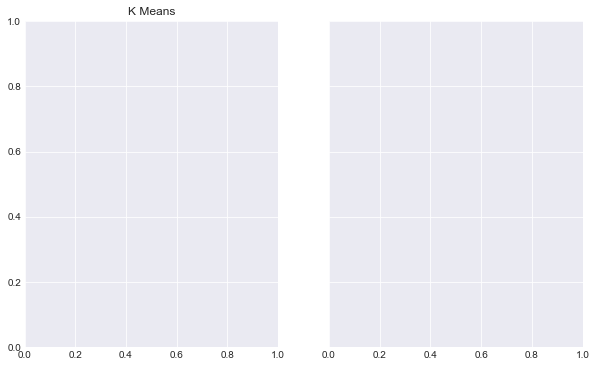

In [64]:
fig , (ax1,ax2)=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means') #Tuple unpacking done here
ax1.scatter(df['Cluster'][0][:,0],df['Cluster'][0][:,1], c=kmeansZ.labels_, cmap='rainbow')

#ax2.set_title('Original')
#ax2.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')

In [72]:
#ax1 = df.plot.scatter(df['Cluster'][:,0],df['Cluster'][:,1], c=kmeansZ.labels_)
ax1.scatter(df['Cluster'][:,0],df['Cluster'][:,1], c=kmeansZ.labels_, cmap='rainbow')


ValueError: Can only tuple-index with a MultiIndex